In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

In [ ]:
## Chargement des données
df = pd.read_csv("/content/drive/MyDrive/cours_AI/data/maisons.csv")

# Afficher les premiéres lignes de la base de données ou du fichier csv
df.head()

,Surface_m2,Prix_maison
0,132,443316
1,209,718728
2,122,433826
3,44,177347
4,136,479700


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Vérifier les types de chacunes des varaibles
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Surface_m2   100 non-null    int64
 1   Prix_maison  100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [ ]:
## Vérification des données manquantes
df.isnull().sum()

,0
Surface_m2,0
Prix_maison,0


In [ ]:
## Définition des variables
X = df[["Surface_m2"]]
y = df["Prix_maison"]

In [ ]:
X

,Surface_m2
0,132
1,209
2,122
3,44
4,136
...,...
95,124
96,77
97,44
98,229


In [ ]:
y

,Prix_maison
0,443316
1,718728
2,433826
3,177347
4,479700
...,...
95,440038
96,285839
97,155736
98,780055


In [ ]:
## Division en données d’entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Surface_m2
55,102
88,175
26,159
42,44
69,217
...,...
60,89
71,201
14,117
92,231


In [ ]:
X_test

,Surface_m2
83,83
53,164
70,228
45,204
44,219
39,249
22,31
80,161
10,240
0,132


In [ ]:
y_train

,Prix_maison
55,358870
88,617891
26,557579
42,162210
69,738722
...,...
60,311389
71,678505
14,431219
92,769829


In [ ]:
y_test

,Prix_maison
83,285573
53,569503
70,782805
45,695512
44,754491
39,850013
22,125511
80,559234
10,817243
0,443316


In [ ]:
## Création et entraînement du modèle
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([298709.77994619, 567926.27556985, 780640.54371694, 700872.69316178,
       750727.59975875, 850437.4129527 , 125879.43707668, 557955.29425045,
       820524.46899452, 461569.1414963 , 624428.50304642, 654341.4470046 ,
       700872.69316178, 192352.64587265, 265473.17554821, 474863.7832555 ,
       388448.61182074, 664312.428324  , 368506.64918195, 797258.84591593])

In [ ]:
## Précision du modèle
accuracy = model.score(X_test, y_test)
print(f"Précision du modèle (R²): {accuracy*100:.2f}%")

Précision du modèle (R²): 99.76%


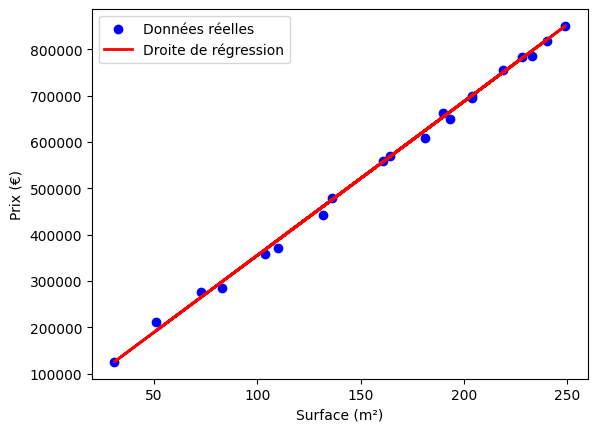

In [ ]:
## Visualisation du modèle
plt.scatter(X_test, y_test, color="blue", label="Données réelles")
plt.plot(X_test, model.predict(X_test), color="red", linewidth=2, label="Droite de régression")
plt.xlabel("Surface (m²)")
plt.ylabel("Prix (€)")
plt.legend()
plt.show()

In [ ]:
# Prédiction sur les données de test
y_pred = model.predict(X_test)

# Valeurs prédites sur les données de test vs les données de test
df_1 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred})
df_1

,y_test,Y_pred
83,285573,298709.779946
53,569503,567926.275570
70,782805,780640.543717
45,695512,700872.693162
44,754491,750727.599759
39,850013,850437.412953
22,125511,125879.437077
80,559234,557955.294250
10,817243,820524.468995
0,443316,461569.141496


In [ ]:
## Prédictions pour de nouvelles valeurs
data = pd.DataFrame({"Surface_m2": [50, 120, 200]})
pred = model.predict(data)

# Afficher les valeurs prédites
data["Prix_prédit"] = model.predict(data)
data

,Surface_m2,Prix_prédit
0,50,189028.985433
1,120,421685.216219
2,200,687578.051403
